In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
import statsmodels.api as st
import math


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
np.random.seed(88)

k = 69.
samp = np.random.poisson(k, 1000)

# Poisson distribution with mean 69

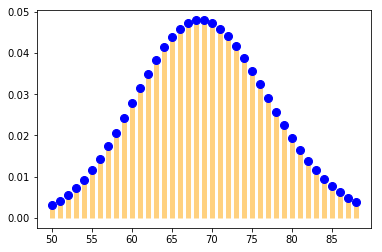

In [3]:
from scipy.stats import poisson
x = np.arange(poisson.ppf(0.01, k), poisson.ppf(0.99, k))
plt.plot(x, poisson.pmf(x, k), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, k), colors='orange', lw=5, alpha=0.5)


# Plot a distribution with the chosen parameters (Poisson with lambda = 69, 1000 observations)

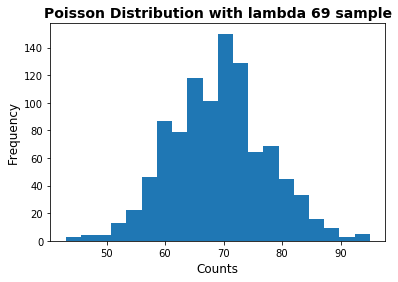

In [4]:
pl.hist(samp, bins = 20);

pl.xlabel("Counts", fontsize=12)
pl.ylabel("Frequency", fontsize=12)
pl.title("Poisson Distribution with lambda 69 sample", weight='bold', fontsize=14)


# Create 1000 Poisson distributions with the selected characteristics and plot the distribution of the means.

In [5]:
nit = 1000

myDmeans = np.zeros(nit)
for i in range (nit):
    poisamp = np.random.poisson (k, 1000)
    myDmeans[i] = poisamp.mean()

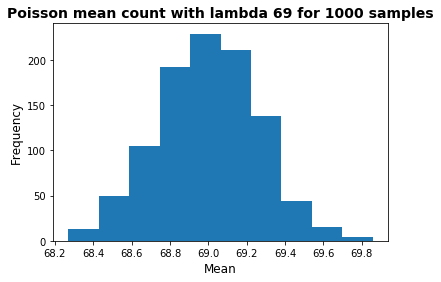

In [6]:
pl.hist(myDmeans);

pl.xlabel("Mean", fontsize=12)
pl.ylabel("Frequency", fontsize=12)
pl.title("Poisson mean count with lambda 69 for 1000 samples", weight='bold', fontsize=14)

# Do the Z test for all the distributions and plot the results

In [7]:
ztests = ((k - myDmeans) * np.sqrt(1000))/math.sqrt(k)

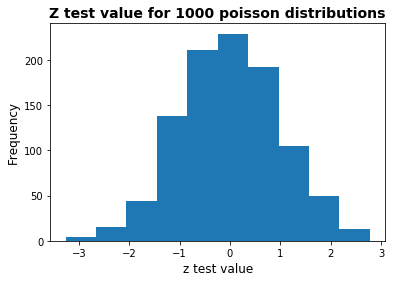

In [8]:
pl.hist(ztests);

pl.xlabel("z test value", fontsize=12)
pl.ylabel("Frequency", fontsize=12)
pl.title("Z test value for 1000 poisson distributions", weight='bold', fontsize=14)

# Plot the Z test distribution of the samples we had against a normal distribution with mean 0 and std 1.

In [9]:
normal = np.random.normal(0, 1, 1000)

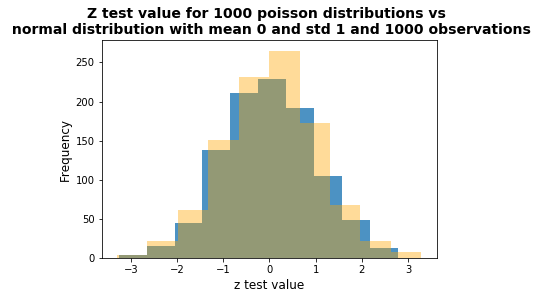

In [10]:
pl.hist(ztests, alpha = 0.8, label = "poisson z tests");
pl.hist(normal, color = "orange", alpha = 0.4, label = "normal distribution");

pl.xlabel("z test value", fontsize=12)
pl.ylabel("Frequency", fontsize=12)
pl.title("Z test value for 1000 poisson distributions vs \n normal distribution with mean 0 and std 1 and 1000 observations", weight='bold', fontsize=14)

# Run the tests to see if the Null Hypothesis is rejected. 

# The null hypothesis is that the z tests distribution is equal to a normal distribution with mean 0 and std 1.

In [11]:
sp.stats.kstest(ztests, "norm")

KstestResult(statistic=0.021023804912636557, pvalue=0.7686941804443933)

In [12]:
sp.stats.anderson(ztests, "norm")

AndersonResult(statistic=0.16886659565875561, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

# Tests interpretation

The K-S tests shows us that you cannot reject the Null Hypothesis, which means that it is likely that the z tests distribution is similar to a normal distribution.

Regarding the A-D test, you do not reject the Null Hypothesis, given that the statistic value is below 0.784. Which means that the z tests distribution is similar to a normal distribution.

What this means is that the distribution of the Z tests regarding a poisson distribution is similar to a Normal distribution with mean 0 and std 1.